In [2]:
#RUN CELL ONLY WHEN GOOGLE COLAB USED
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Colab Notebooks/Final Project/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/Final Project/'
/content/drive/MyDrive/Colab Notebooks/Final Project


In [3]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsRegressor # KNN for regression
from sklearn.model_selection import GridSearchCV ,cross_val_score# For hyperparameter tuning
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score # For model evaluation
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression

!pip install dmba
from dmba import regressionSummary, backward_elimination, AIC_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 84.6 MB/s eta 0:00:00
Colab environment detected.


In [4]:
# STEP 1: LOAD AND PREVIEW DATA
houseprice_df = pd.read_csv('Real estate.csv')
houseprice_df.head()

#Note:
#No: Transaction ID
#X1 transaction date: Date of the house purchase
#X2 house age: The age of the house in months
#X3 distance to the nearest MRT station: Distance to nearest MRT station in meters
#X4 number of convenience stores: Number of convenience stores near the house
#X5 latitude: Latitude of the house location
#X6 longitude: Longitude of the house location
#Y house price of unit area: House price per unit area

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
#STEP 2: DATA CLEANING AND PREPARATION
#Display dimensions of data frame
houseprice_df.shape

(414, 8)

In [6]:
# Fixing inconsistent formatting
houseprice_df.columns = houseprice_df.columns.str.strip().str.lower().str.replace(" ", "_")

# Rename 'no' column to 'transaction_id'
houseprice_df.rename(columns={'no': 'transaction_id'}, inplace=True)

# Display the updated DataFrame
houseprice_df.head(20)


,transaction_id,x1_transaction_date,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores,x5_latitude,x6_longitude,y_house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [7]:
# Checking for missing values in each column
houseprice_df.isnull().sum()

#Note: No missing values found

,0
transaction_id,0
x1_transaction_date,0
x2_house_age,0
x3_distance_to_the_nearest_mrt_station,0
x4_number_of_convenience_stores,0
x5_latitude,0
x6_longitude,0
y_house_price_of_unit_area,0


In [8]:
# Checking for duplicate rows
print("\nDuplicate rows found:")
houseprice_df.duplicated().sum()

#Note: No duplicate records found


Duplicate rows found:


np.int64(0)

In [9]:
# Checking for data types
houseprice_df.dtypes

#Note: All column's datatypes are appropriate

,0
transaction_id,int64
x1_transaction_date,float64
x2_house_age,float64
x3_distance_to_the_nearest_mrt_station,float64
x4_number_of_convenience_stores,int64
x5_latitude,float64
x6_longitude,float64
y_house_price_of_unit_area,float64


In [10]:
# Checking Outliers and Data Distribution
# Display descriptive statistics to get an overview of the data
# distribution and identify potential outliers (e.g., min/max values far from quartiles).
print("\n--- Descriptive Statistics of Numerical Columns ---")
print(houseprice_df.describe())

#Note: "x3_distance_to_the_nearest_mrt_station" and "y_house_price_of_unit_area" variables seemingly have outliers based on their min and max
#values respectively. 'transaction_id' and 'x1_transaction_date' columns are ignored because the former is not a potential predictor of the house
#price variable and the latter is a potential predictor but has notable inconsistent and inaccuracte data. Hence, instead of this varible we will
#consider 'x2_house_age' variable because it is saying the same story as transaction date variable but is more accurate and consistent.


--- Descriptive Statistics of Numerical Columns ---
       transaction_id  x1_transaction_date  x2_house_age  \
count      414.000000           414.000000    414.000000   
mean       207.500000          2013.148971     17.712560   
std        119.655756             0.281967     11.392485   
min          1.000000          2012.667000      0.000000   
25%        104.250000          2012.917000      9.025000   
50%        207.500000          2013.167000     16.100000   
75%        310.750000          2013.417000     28.150000   
max        414.000000          2013.583000     43.800000   

       x3_distance_to_the_nearest_mrt_station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max           

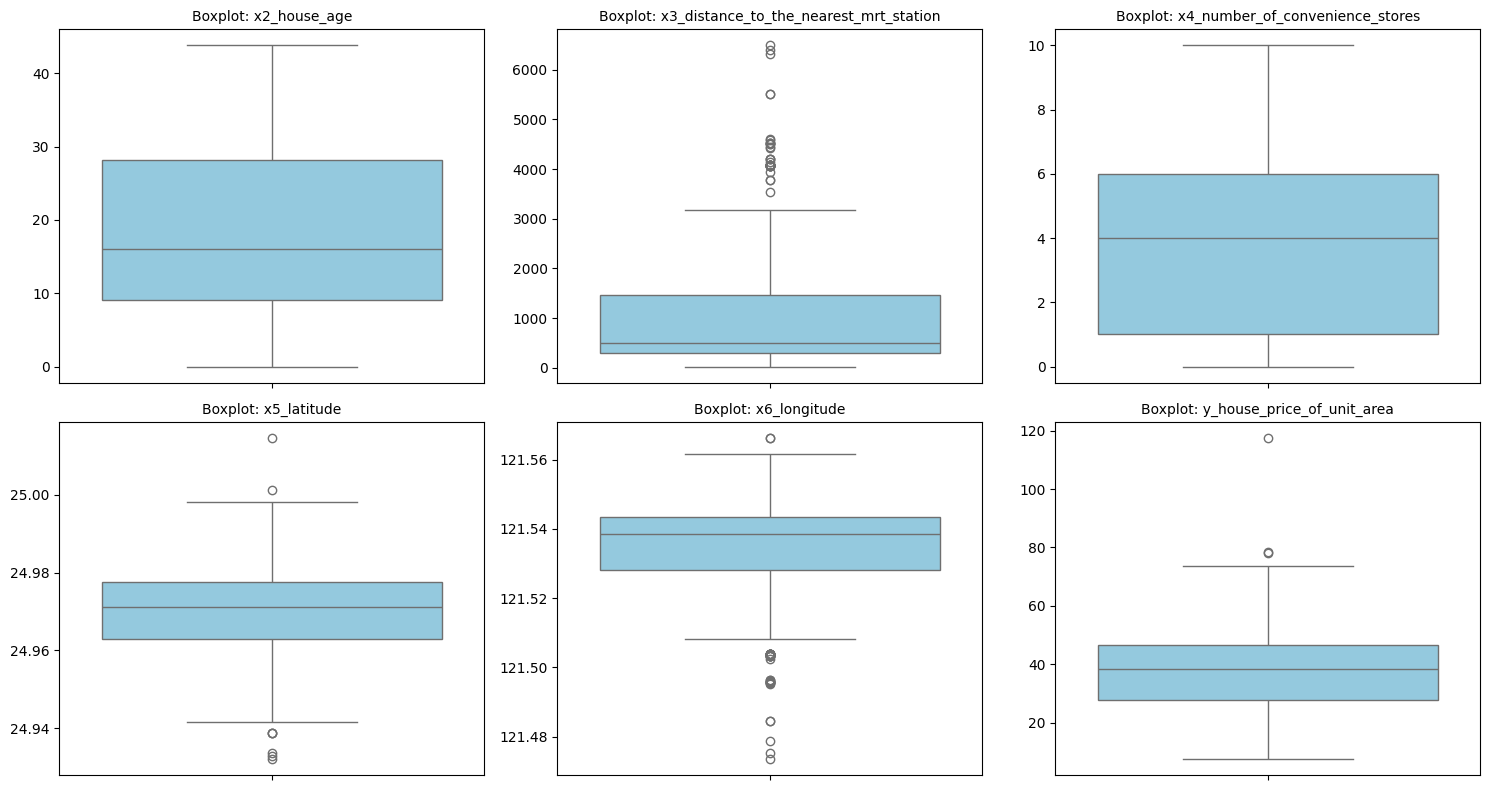

In [11]:
# Graphical representation of outliers to confirm outlier detection for "x3_distance_to_the_nearest_mrt_station" and "y_house_price_of_unit_area" variables
#And checking for potential outliers in other variables
columns_to_plot = ['x2_house_age','x3_distance_to_the_nearest_mrt_station','x4_number_of_convenience_stores','x5_latitude','x6_longitude', 'y_house_price_of_unit_area']
plt.figure(figsize=(15, 8))

# Create one boxplot per column
for i, col in enumerate(columns_to_plot):
    ax = plt.subplot(2, 3, i + 1)
    sns.boxplot(y=houseprice_df[col], color="skyblue", ax=ax)
    ax.set_title(f'Boxplot: {col}', fontsize=10)
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

#Note: 'x3_distance_to_the_nearest_mrt_station','x5_latitude','x6_longitude', 'y_house_price_of_unit_area' variables are confirmed to have outliers

In [12]:
#Count the outliers in each of the columns
# Function to count outliers using IQR method
# Updated function to return outlier values
def get_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

# Apply to selected columns
for col in ['x3_distance_to_the_nearest_mrt_station', 'x5_latitude', 'x6_longitude', 'y_house_price_of_unit_area']:
    outliers = get_outliers(houseprice_df[col])
    print(f"\nNumber of outliers in {col}: {outliers.count()}")
    print(f"Outlier values in {col}:\n{outliers.values}")

#Outliers Handling:
#'x5_latitude' and 'x6_longitude' columns have outliers but they are valid values for location of the houses. Removing or altering
#them can distort information and analysis. Hence, the outliers of these two variables will remain in the dataset without any changes.
#Other 2 outliers will be handled in the upcoming 2 code cells:
#The outliers in 'x3_distance_to_the_nearest_mrt_station' column will be handled through winsorizing(capping) to reduce extreme impact but keep the
#data points valid and the outliers in 'y_house_price_of_unit_area' column will be eliminated from dataset since the outliers are very few(3)in number


Number of outliers in x3_distance_to_the_nearest_mrt_station: 37
Outlier values in x3_distance_to_the_nearest_mrt_station:
[5512.038 4519.69  4079.418 4082.015 4066.587 4605.749 4510.359 4510.359
 4082.015 4066.587 3947.945 6396.283 4197.349 3780.59  4066.587 4082.015
 4066.587 4527.687 4573.779 4449.27  4082.015 4066.587 3771.895 4082.015
 4074.736 4412.765 6306.153 5512.038 4082.015 4197.349 4197.349 4519.69
 6488.021 3529.564 4066.587 4136.271 4082.015]

Number of outliers in x5_latitude: 8
Outlier values in x5_latitude:
[25.01459 24.93885 24.93293 24.93363 25.00115 24.93885 24.93885 24.93207]

Number of outliers in x6_longitude: 35
Outlier values in x6_longitude:
[121.48458 121.49587 121.50381 121.50342 121.49578 121.49542 121.49542
 121.50381 121.50342 121.50243 121.47883 121.50383 121.50342 121.50381
 121.50342 121.49628 121.49507 121.49621 121.50381 121.56627 121.50342
 121.50381 121.50357 121.49587 121.47516 121.48458 121.50381 121.56627
 121.50383 121.50383 121.49587 121.4735

In [13]:
# Function to cap values above a specified upper percentile for 'x3_distance_to_the_nearest_mrt_station' column
def cap_outliers(series, upper_percentile=0.97):
    upper_bound = series.quantile(upper_percentile)
    return series.clip(upper=upper_bound)

# Apply capping
houseprice_df['x3_distance_to_the_nearest_mrt_station'] = cap_outliers(houseprice_df['x3_distance_to_the_nearest_mrt_station'])
print(f"{'x3_distance_to_the_nearest_mrt_station'}: capped at 97th percentile = {houseprice_df['x3_distance_to_the_nearest_mrt_station'].max()}")

x3_distance_to_the_nearest_mrt_station: capped at 97th percentile = 4435.033050000001


In [14]:
#Remove records with outliers in 'y_house_price_of_unit_area' column
# Define outlier values to remove
outlier_values = [78.3, 117.5, 78.0]

# Remove rows where 'y_house_price_of_unit_area' has these values
houseprice_df = houseprice_df[~houseprice_df['y_house_price_of_unit_area'].isin(outlier_values)]

# Confirm removal
print("Remaining rows after removing outliers:", len(houseprice_df))

Remaining rows after removing outliers: 411


In [15]:
# STEP 3: DATA ANALYSIS FOR DATA UNDERSTANDING
#Display descriptive statistics of the variables
houseprice_df.describe()

#Inference: We can understand various aspects about each of the variables such as count, mean, std, min, 25% quartile, 50% quartile, 75% quartile and max values

,transaction_id,x1_transaction_date,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores,x5_latitude,x6_longitude,y_house_price_of_unit_area
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,207.055961,2013.147019,17.638929,1068.601867,4.077859,24.968993,121.533328,37.591241
std,119.935976,0.281884,11.354608,1192.369811,2.932371,0.012446,0.015391,12.768915
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,103.500000,2012.917000,8.950000,289.324800,1.000000,24.962990,121.527600,27.500000
50%,206.000000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.400000
75%,310.500000,2013.417000,27.800000,1455.798000,6.000000,24.977705,121.543395,46.300000
max,414.000000,2013.583000,43.800000,4435.033050,10.000000,25.014590,121.566270,73.600000


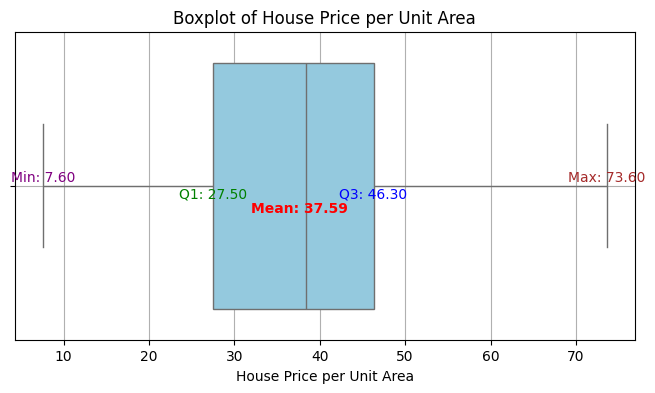

In [16]:
# Plotting the boxplot for house price per unit area
mean = np.mean(houseprice_df['y_house_price_of_unit_area'])
q1 = np.percentile(houseprice_df['y_house_price_of_unit_area'], 25)
q3 = np.percentile(houseprice_df['y_house_price_of_unit_area'], 75)
min_val = np.min(houseprice_df['y_house_price_of_unit_area'])
max_val = np.max(houseprice_df['y_house_price_of_unit_area'])

plt.figure(figsize=(8, 4))
sns.boxplot(x=houseprice_df['y_house_price_of_unit_area'], color='skyblue',)
plt.title('Boxplot of House Price per Unit Area')
plt.xlabel('House Price per Unit Area')
plt.grid(True)
plt.text(mean, 0.05, f'Mean: {mean:.2f}', ha='center', va='top', color='red', fontweight='bold')
plt.text(q1, 0.05, f'Q1: {q1:.2f}', ha='center', va='bottom', color='green')
plt.text(q3, 0.05, f'Q3: {q3:.2f}', ha='center', va='bottom', color='blue')
plt.text(min_val, -0.05, f'Min: {min_val:.2f}', ha='center', va='top', color='purple')
plt.text(max_val, -0.05, f'Max: {max_val:.2f}', ha='center', va='top', color='brown')
plt.show()

#Inference:The boxplot of 411 observations shows a mean of 37.98.
#A wide range from 7.6 to 117.5 indicates significant variability, while the interquartile range of 18.9 highlights diverse mid-range prices.
#In this case, the outliers are anything above upper quartile(75). The existence of outliers suggest right skewness, revealing a few highly
#priced properties that create disparities in the housing market and affect overall price distribution.

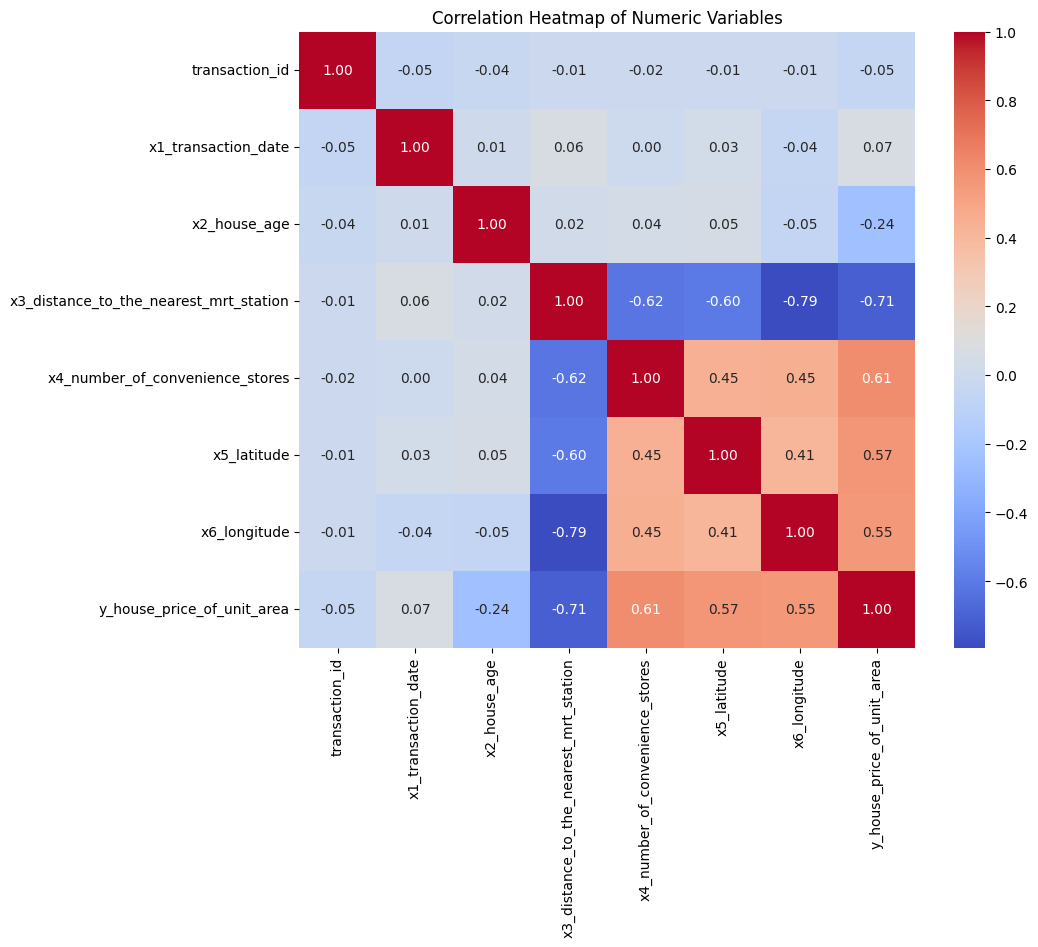

In [17]:
# Generating and plotting the correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = houseprice_df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

#Inference: "transaction_id" and "x1_transaction_date" have low correlation with outcome variable "y_house_price_of_unit_area". Hence, we will NOT
# be considering these two variables during variable selection for any of the model building process. "x2_house_age" have moderate correlation with outcome
#variable while all the other potential predictors which are "x3_distance_to_the_nearest_mrt_station", "x4_number_of_convenience_stores",
#"x5_latitude" and "x6_longitude" have moderate to high correlation with outcome variable. Hence, the remaining variables will be considered during
#variable selection in the model building processes.

In [18]:
#Removing "transaction_id" and "x1_transaction_date" columns from houseprice_df
houseprice_df = houseprice_df.drop(columns=['transaction_id', 'x1_transaction_date'])
houseprice_df.head()

,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores,x5_latitude,x6_longitude,y_house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [19]:
#STEP 4: PREDICTIVE MODELLING
#Model 1: Linear Regression
#Defining predictors and outcome variables for variable selection through backward elimination
predictors = ['x2_house_age', 'x3_distance_to_the_nearest_mrt_station', 'x4_number_of_convenience_stores', 'x5_latitude', 'x6_longitude']
outcome = 'y_house_price_of_unit_area'

#Partition data into predictors (x) and output (y)
X = houseprice_df[predictors]
y = houseprice_df[outcome]

#Split the data into training and validation datasets. Validation dataset size is 40% of the input datasize
train_X, valid_X, train_y, valid_y = train_test_split(X,y,test_size=0.4,random_state=1)

#Backward elimination for variable selection
def train_model(variables):
  model = LinearRegression()
  model.fit(train_X[variables], train_y)
  return model
def score_model(model, variables):
  return AIC_score(train_y, model.predict(train_X[variables]), model)
best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)
print(best_variables)

#The optimal parameters are chosen by backward elimination process for this linear regression model/algorithm. The model stats with all available
#features and it iteratively removes the least significant features using AIC score (Akaike Information Criterion). Once every remaining features
#are significant, the model stops the process and gives the list of "best variables" where all features are significant in predicting the outcome
#variable which is "house price of unit area".

Variables: x2_house_age, x3_distance_to_the_nearest_mrt_station, x4_number_of_convenience_stores, x5_latitude, x6_longitude
Start: score=1725.29
Step: score=1723.64, remove x6_longitude
Step: score=1723.64, remove None
['x2_house_age', 'x3_distance_to_the_nearest_mrt_station', 'x4_number_of_convenience_stores', 'x5_latitude']


In [20]:
#Train model on "best_variables"
best_model.fit(train_X[best_variables], train_y)

#Print coefficients of the selected variables(best_variables)
for var, coef in zip(best_variables, best_model.coef_):
  print(f"{var}: {coef}")

x2_house_age: -0.20188499204410298
x3_distance_to_the_nearest_mrt_station: -0.004364137494374875
x4_number_of_convenience_stores: 1.0632588474519362
x5_latitude: 203.88581794032262


In [21]:
#Training Data: Predicting using predictor variables selected in backward elimination process
pred_y = best_model.predict(train_X[best_variables])
regressionSummary(train_y, pred_y)

result = pd.DataFrame({'Predicted': pred_y,'Actual': train_y,'Residual': train_y - pred_y})


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 7.8459
            Mean Absolute Error (MAE) : 5.6751
          Mean Percentage Error (MPE) : -5.3098
Mean Absolute Percentage Error (MAPE) : 18.2363


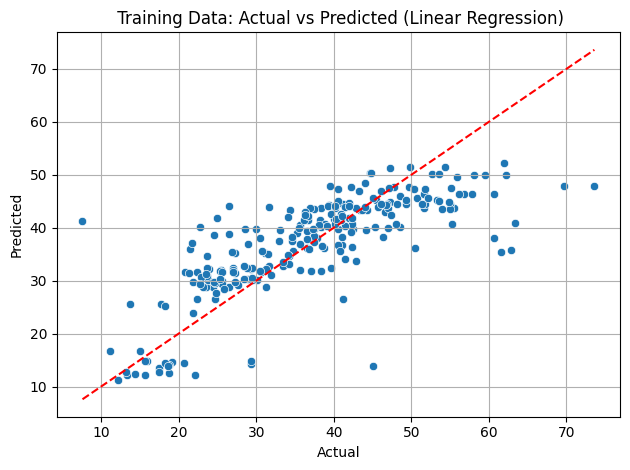

In [22]:
# Plot Actual vs Predicted for training data
plt.figure()
sns.scatterplot(x=train_y, y=pred_y)
plt.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'r--')
plt.title(" Training Data: Actual vs Predicted (Linear Regression)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

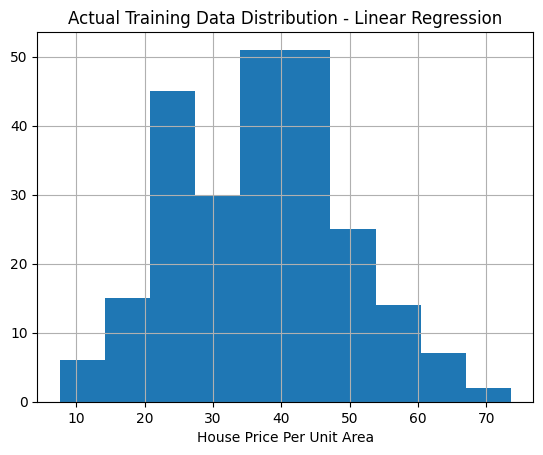

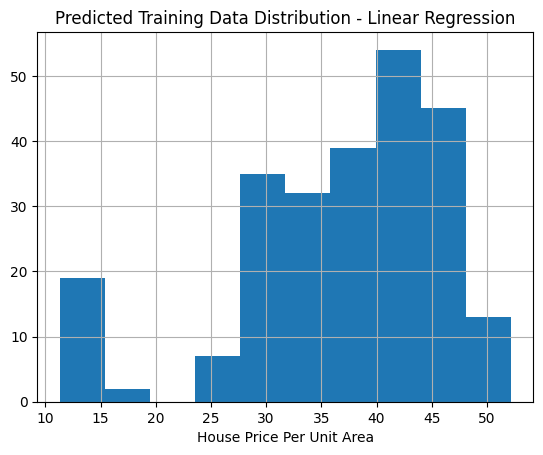

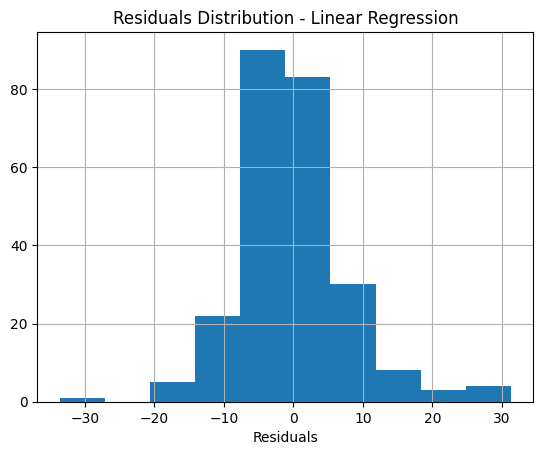

In [23]:
#Plot the actual, predicted and residuals of training data
fig, ax = plt.subplots()
ax = train_y.hist()
ax.set_xlabel('House Price Per Unit Area')
plt.title("Actual Training Data Distribution - Linear Regression")

fig, ax = plt.subplots()
ax = result['Predicted'].hist()
ax.set_xlabel('House Price Per Unit Area')
plt.title("Predicted Training Data Distribution - Linear Regression")

fig, ax = plt.subplots()
ax = result['Residual'].hist()
ax.set_xlabel('Residuals')
plt.title("Residuals Distribution - Linear Regression")
plt.show()

In [24]:
#Validation Data: Predicting using predictor variables selected in backward elimination process
pred_y = best_model.predict(valid_X[best_variables])
regressionSummary(valid_y, pred_y)

result = pd.DataFrame({'Predicted': pred_y,'Actual': valid_y,'Residual': valid_y - pred_y})


Regression statistics

                      Mean Error (ME) : 1.2256
       Root Mean Squared Error (RMSE) : 7.6140
            Mean Absolute Error (MAE) : 5.8800
          Mean Percentage Error (MPE) : -1.4676
Mean Absolute Percentage Error (MAPE) : 16.5996


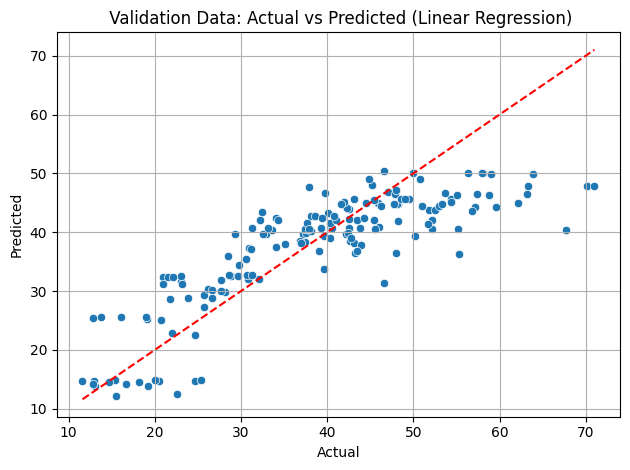

In [25]:
# Plot Actual vs Predicted for validation data
plt.figure()
sns.scatterplot(x=valid_y, y=pred_y)
plt.plot([valid_y.min(), valid_y.max()], [valid_y.min(), valid_y.max()], 'r--')
plt.title(" Validation Data: Actual vs Predicted (Linear Regression)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

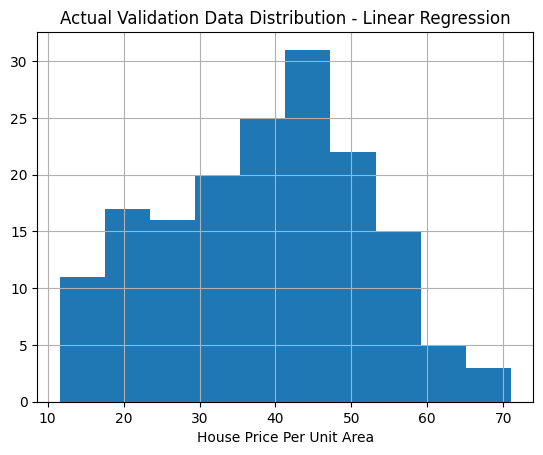

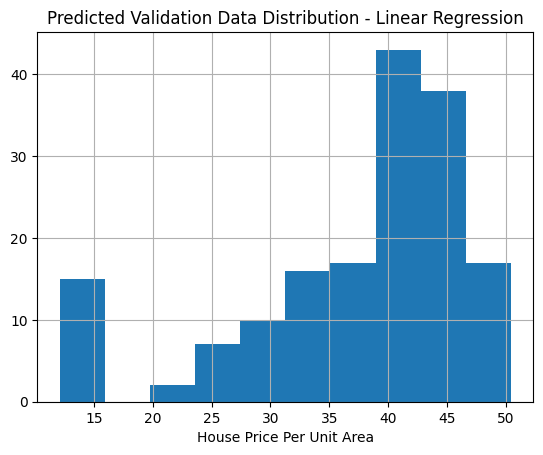

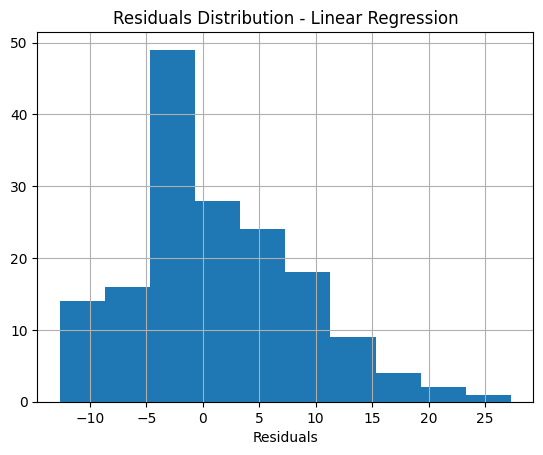

In [26]:
#Plot the actual, predicted and residuals of validation data
fig, ax = plt.subplots()
ax = valid_y.hist()
ax.set_xlabel('House Price Per Unit Area')
plt.title("Actual Validation Data Distribution - Linear Regression")

fig, ax = plt.subplots()
ax = result['Predicted'].hist()
ax.set_xlabel('House Price Per Unit Area')
plt.title("Predicted Validation Data Distribution - Linear Regression")

fig, ax = plt.subplots()
ax = result['Residual'].hist()
ax.set_xlabel('Residuals')
plt.title("Residuals Distribution - Linear Regression")
plt.show()

In [27]:
#Model 2: Random Forest Regressor
#Defining predictors and outcome variables for variable selection through RFECV
predictors = ['x2_house_age', 'x3_distance_to_the_nearest_mrt_station', 'x4_number_of_convenience_stores', 'x5_latitude', 'x6_longitude']
outcome = 'y_house_price_of_unit_area'

#Partition data into predictors (x) and output (y)
X = houseprice_df[predictors]
y = houseprice_df[outcome]

#Split the data into training and validation datasets. Validation dataset size is 40% of the input datasize
train_X, valid_X, train_y, valid_y = train_test_split(X,y,test_size=0.4,random_state=1)

# Define the best parameters for the Random Forest model
best_params = {
    "n_estimators": 150,
    "max_depth": 10,
    "min_samples_split": 8,
    "min_samples_leaf": 2,
    "max_features": 'sqrt'
}

# Initialize Random Forest Regressor with reasonable params
rf = RandomForestRegressor(**best_params, random_state=42)

# RFECV: Recursive feature elimination with cross-validation for variable selection
rfecv = RFECV(
    estimator=rf,
    step=1,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit RFECV on training data
rfecv.fit(train_X, train_y)

# Get the variables selected through RFECV
selected_features = train_X.columns[rfecv.support_]
print("Optimal number of features:", rfecv.n_features_)
print("Selected features:", list(selected_features))

# The optimal features are chosen by the RFECV process using a Random Forest model.
# The model starts with all available features and iteratively removes the least important features based on feature importance.
# At each step, the model performance is evaluated using 5-fold cross-validation with mean squared error as the metric.
# This process continues until the subset of features that gives the best cross-validated performance is found.
# The final list of selected features are those that contribute most to accurately predicting the outcome variable,
# which is the "house price of unit area".


Optimal number of features: 5
Selected features: ['x2_house_age', 'x3_distance_to_the_nearest_mrt_station', 'x4_number_of_convenience_stores', 'x5_latitude', 'x6_longitude']


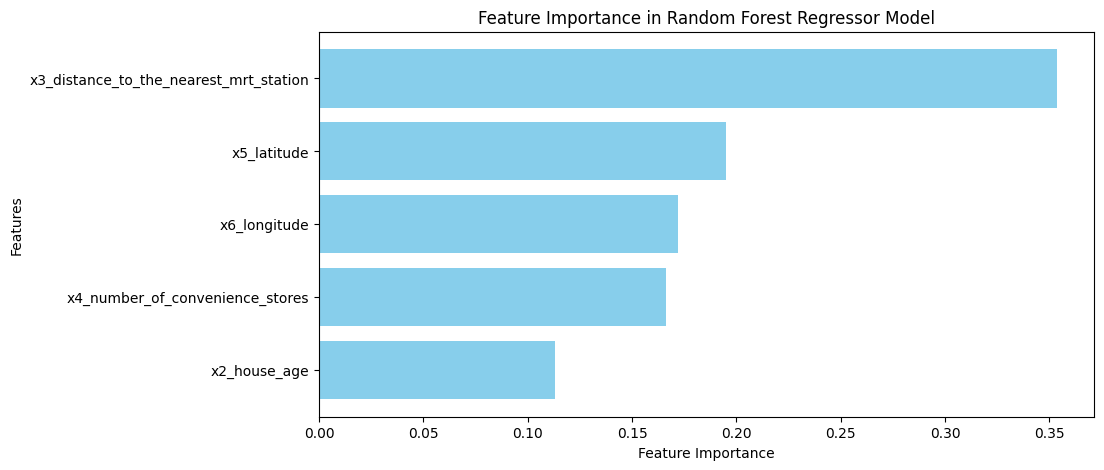

In [28]:
#Train model on "selected_features"
rf.fit(train_X[selected_features], train_y)

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    "Feature": houseprice_df[predictors].columns,
    "Importance": rf.feature_importances_
})

feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot bar chart for feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Regressor Model")
plt.gca().invert_yaxis()

In [29]:
#Training Data: Predicting using "selected_features"
pred_y = rf.predict(train_X[selected_features])
regressionSummary(train_y, pred_y)

result = pd.DataFrame({'Predicted': pred_y,'Actual': train_y,'Residual': train_y - pred_y})


Regression statistics

                      Mean Error (ME) : 0.0556
       Root Mean Squared Error (RMSE) : 4.2926
            Mean Absolute Error (MAE) : 3.1281
          Mean Percentage Error (MPE) : -2.5846
Mean Absolute Percentage Error (MAPE) : 9.7324


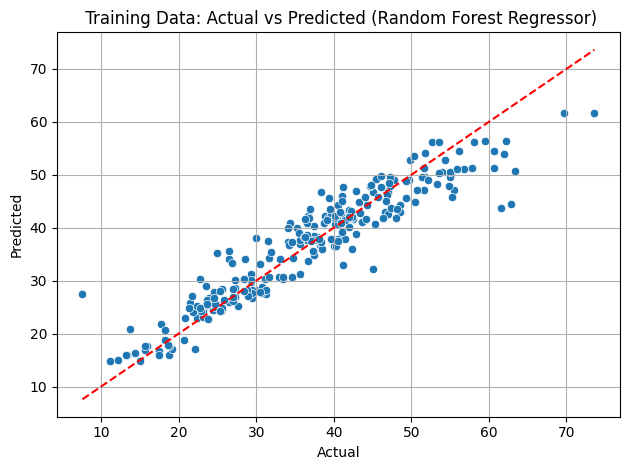

In [30]:
# Plot Actual vs Predicted for training data
plt.figure()
sns.scatterplot(x=train_y, y=pred_y)
plt.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'r--')
plt.title(" Training Data: Actual vs Predicted (Random Forest Regressor)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

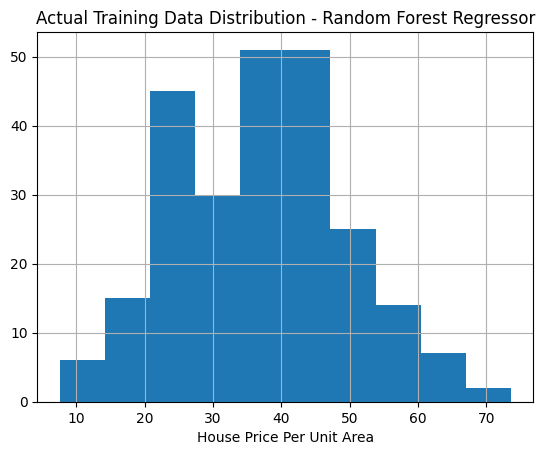

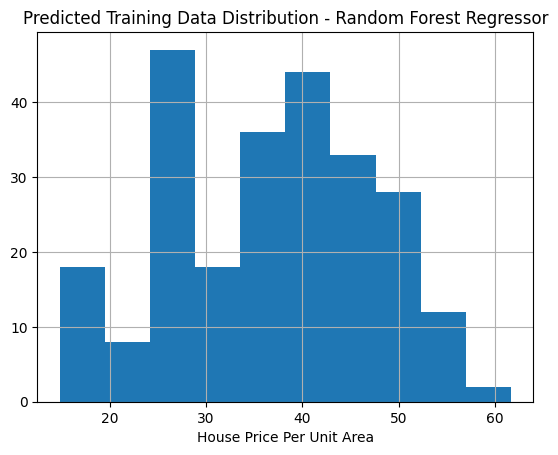

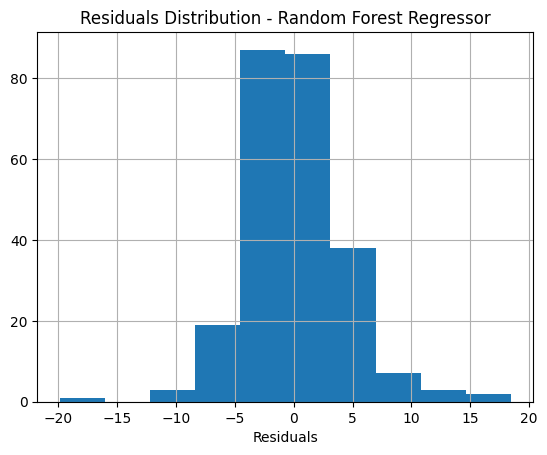

In [31]:
#Plot the actual, predicted and residuals of training data
fig, ax = plt.subplots()
ax = train_y.hist()
ax.set_xlabel('House Price Per Unit Area')
plt.title("Actual Training Data Distribution - Random Forest Regressor")

fig, ax = plt.subplots()
ax = result['Predicted'].hist()
ax.set_xlabel('House Price Per Unit Area')
plt.title("Predicted Training Data Distribution - Random Forest Regressor")

fig, ax = plt.subplots()
ax = result['Residual'].hist()
ax.set_xlabel('Residuals')
plt.title("Residuals Distribution - Random Forest Regressor")
plt.show()

In [32]:
#Validation Data: Predicting using "selected_features"
pred_y = rf.predict(valid_X[selected_features])
regressionSummary(valid_y, pred_y)

result = pd.DataFrame({'Predicted': pred_y,'Actual': valid_y,'Residual': valid_y - pred_y})


Regression statistics

                      Mean Error (ME) : 0.2008
       Root Mean Squared Error (RMSE) : 5.7360
            Mean Absolute Error (MAE) : 4.4204
          Mean Percentage Error (MPE) : -2.8545
Mean Absolute Percentage Error (MAPE) : 12.9027


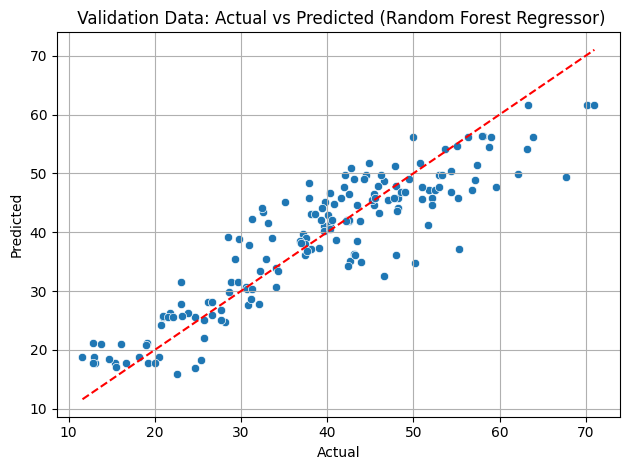

In [33]:
# Plot Actual vs Predicted for validation data
plt.figure()
sns.scatterplot(x=valid_y, y=pred_y)
plt.plot([valid_y.min(), valid_y.max()], [valid_y.min(), valid_y.max()], 'r--', label = "Regression Line")
plt.title(" Validation Data: Actual vs Predicted (Random Forest Regressor)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

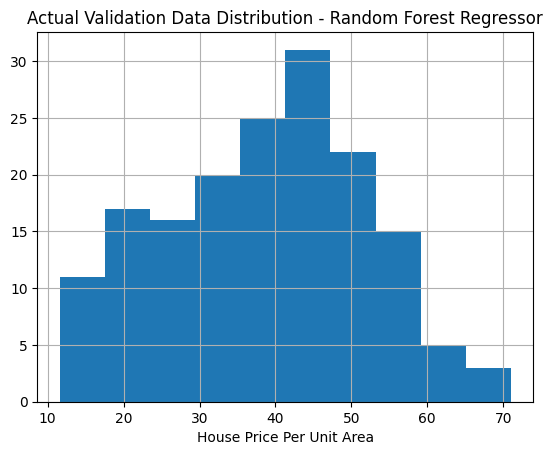

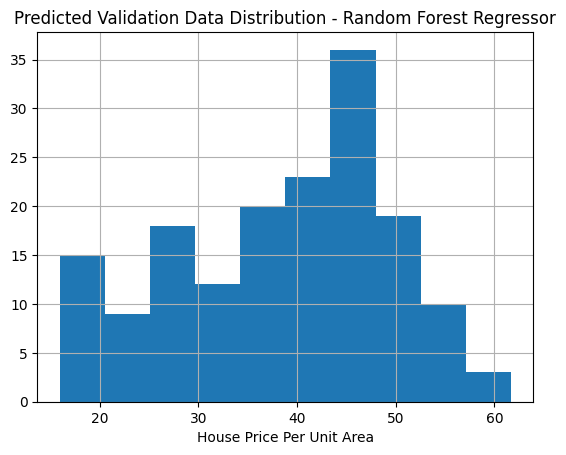

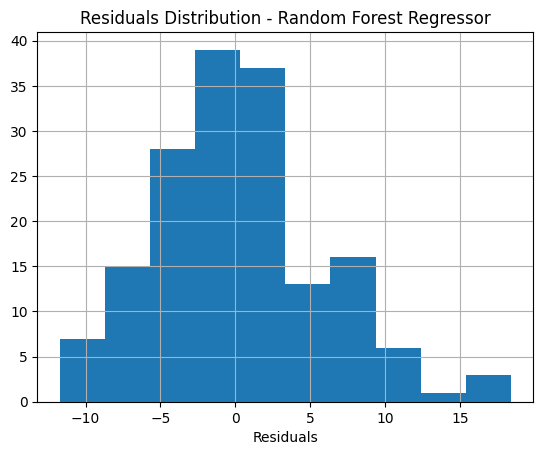

In [34]:
#Plot the actual, predicted and residuals of validation data
fig, ax = plt.subplots()
ax = valid_y.hist()
ax.set_xlabel('House Price Per Unit Area')
plt.title("Actual Validation Data Distribution - Random Forest Regressor")

fig, ax = plt.subplots()
ax = result['Predicted'].hist()
ax.set_xlabel('House Price Per Unit Area')
plt.title("Predicted Validation Data Distribution - Random Forest Regressor")

fig, ax = plt.subplots()
ax = result['Residual'].hist()
ax.set_xlabel('Residuals')
plt.title("Residuals Distribution - Random Forest Regressor")
plt.show()

In [35]:
#Model 3: K-Nearest Neighbors (KNN)
# Define predictors and outcome
predictors = ['x2_house_age', 'x3_distance_to_the_nearest_mrt_station',
              'x4_number_of_convenience_stores', 'x5_latitude', 'x6_longitude']
outcome = 'y_house_price_of_unit_area'

# Split original data into train and validation sets
train_data, valid_data = train_test_split(houseprice_df, test_size=0.4, random_state=1)

# Fit scalers separately for predictors and outcome on training data only
X_scaler = StandardScaler()
y_scaler = StandardScaler()

# Fit on training data
X_scaler.fit(train_data[predictors])
y_scaler.fit(train_data[[outcome]])

# Normalize full dataset (but based on training scalers only)
house_norm = pd.DataFrame(
    X_scaler.transform(houseprice_df[predictors]),
    columns=[f'z_{col}' for col in predictors],
    index=houseprice_df.index
)

# Add normalized outcome
house_norm['z_' + outcome] = y_scaler.transform(houseprice_df[[outcome]])

# Retrieve normalized train and validation sets using original split indices
trainNorm = house_norm.loc[train_data.index]
validNorm = house_norm.loc[valid_data.index]

# Define normalized predictors and target
normalized_predictors = [f'z_{col}' for col in predictors]
normalized_outcome = f'z_{outcome}'

# Partition the normalized data
train_X = trainNorm[normalized_predictors]
train_y = trainNorm[normalized_outcome]
valid_X = validNorm[normalized_predictors]
valid_y = validNorm[normalized_outcome]

print("Train shape:", train_X.shape, train_y.shape)
print("Validation shape:", valid_X.shape, valid_y.shape)

Train shape: (246, 5) (246,)
Validation shape: (165, 5) (165,)


In [36]:
# Variable selection using GridSearchCV

pipe = Pipeline([
    ('select', SelectKBest(score_func=f_regression)),
    ('knn', KNeighborsRegressor())
])

param_grid = {
    'select__k': [2, 3, 4, 5],            # Try selecting 2 to 5 top features
    'knn__n_neighbors': [2, 3, 5, 7, 10]  # Try different k values for KNN
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(train_X, train_y)

print("Best number of features:", grid.best_params_['select__k'])
print("Best K value for KNN:", grid.best_params_['knn__n_neighbors'])
print("Best CV score (neg MSE):", grid.best_score_)

Best number of features: 5
Best K value for KNN: 10
Best CV score (neg MSE): -0.3404663156682694


In [37]:
# Refit with best parameters
best_k = grid.best_params_['select__k']
best_model = grid.best_estimator_

# Save feature names before passing into the pipeline
feature_names = train_X.columns.tolist()

# Fit the selector on the full training set to view the selected features
selector = best_model.named_steps['select']
feature_mask = selector.get_support()
selected_features = [feature for feature, keep in zip(feature_names, feature_mask) if keep]

print("Selected features:", list(selected_features))

Selected features: ['z_x2_house_age', 'z_x3_distance_to_the_nearest_mrt_station', 'z_x4_number_of_convenience_stores', 'z_x5_latitude', 'z_x6_longitude']


In [38]:
#Train model on "selected_features"
best_model.fit(train_X[selected_features], train_y)

Pipeline(steps=[('select',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x7beadbd4ae80>)),
                ('knn', KNeighborsRegressor(n_neighbors=10))])

In [39]:
#Make Predictions on Training Data using "best_variables"
train_pred = best_model.predict(train_X[selected_features])
train_residuals = train_y - train_pred

result = pd.DataFrame({'Predicted':train_pred ,'Actual': train_y,'Residual': train_y - train_pred})

In [40]:
# Denormalize predictions and actuals
train_pred_orig = y_scaler.inverse_transform(train_pred.reshape(-1, 1))
train_y_orig = y_scaler.inverse_transform(train_y.values.reshape(-1, 1))


In [41]:
#Evaluate the Model
regressionSummary(train_y_orig ,train_pred_orig)


Regression statistics

                      Mean Error (ME) : -0.2591
       Root Mean Squared Error (RMSE) : 6.4744
            Mean Absolute Error (MAE) : 4.7162
          Mean Percentage Error (MPE) : -5.0943
Mean Absolute Percentage Error (MAPE) : 14.9389


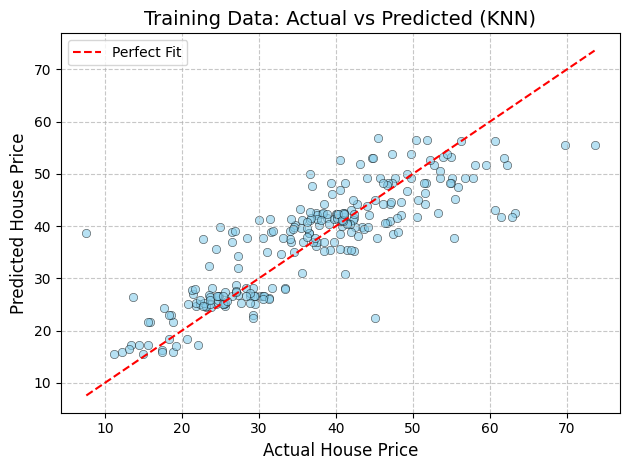

In [42]:
# Visualization – Training Data
train_y_orig = train_y_orig.ravel()
train_pred_orig = train_pred_orig.ravel()

# Plotting actual vs predicted values
plt.figure()
sns.scatterplot(x=train_y_orig, y=train_pred_orig, alpha=0.6, color='skyblue', edgecolor='k')

# Reference line (perfect prediction line)
min_val = min(train_y_orig.min(), train_pred_orig.min())
max_val = max(train_y_orig.max(), train_pred_orig.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Fit')

# Labels and title
plt.title("Training Data: Actual vs Predicted (KNN)", fontsize=14)
plt.xlabel("Actual House Price", fontsize=12)
plt.ylabel("Predicted House Price", fontsize=12)

# Additional plot features
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

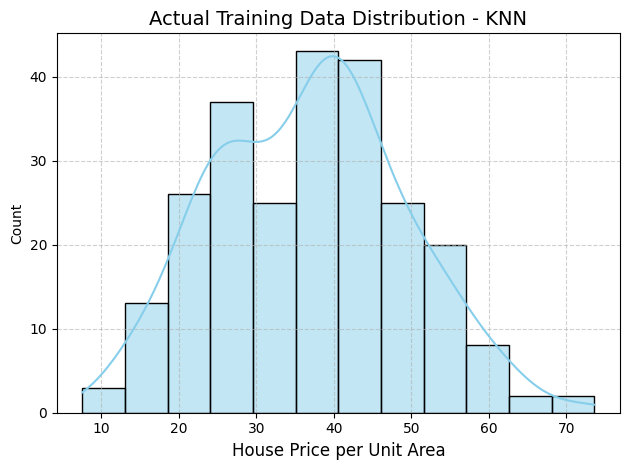

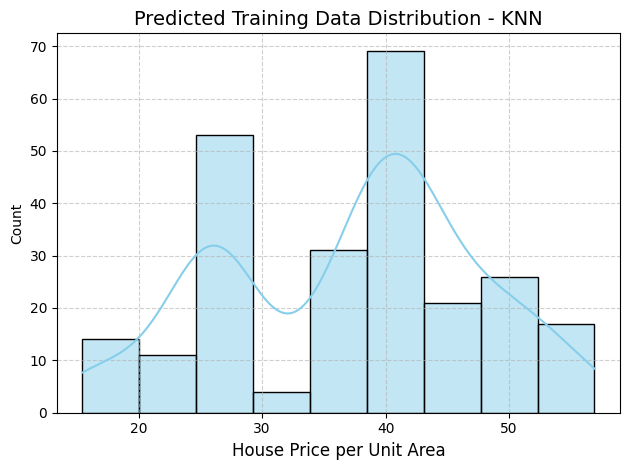

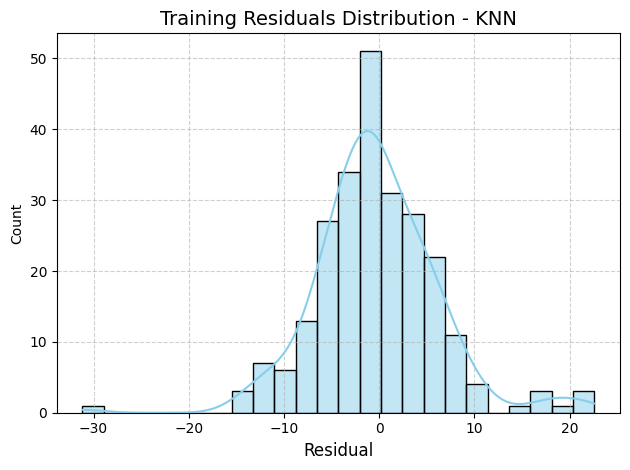

In [43]:
# Recalculate residuals in original scale
train_residuals_orig = train_y_orig - train_pred_orig

# Create a result DataFrame (optional, for plotting consistency)
result = pd.DataFrame({
    'Actual': train_y_orig,
    'Predicted': train_pred_orig,
    'Residual': train_residuals_orig
})

# Plot Actual Training Data Distribution
plt.figure()
sns.histplot(result['Actual'], kde=True, color='skyblue')
plt.xlabel('House Price per Unit Area', fontsize=12)
plt.title("Actual Training Data Distribution - KNN", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot Predicted Training Data Distribution
plt.figure()
sns.histplot(result['Predicted'], kde=True, color='skyblue')
plt.xlabel('House Price per Unit Area', fontsize=12)
plt.title("Predicted Training Data Distribution - KNN", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot Training Residuals Distribution
plt.figure()
sns.histplot(result['Residual'], kde=True, color='skyblue')
plt.xlabel('Residual', fontsize=12)
plt.title("Training Residuals Distribution - KNN", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [44]:
#Make Predictions on Validation Data using "best_variables"
valid_pred = best_model.predict(valid_X[selected_features])
valid_residuals = valid_y - valid_pred

result1 = pd.DataFrame({'Predicted':valid_pred ,'Actual': valid_y,'Residual': valid_y - valid_pred})

In [45]:
# Denormalize predictions and actuals
valid_pred_orig = y_scaler.inverse_transform(valid_pred.reshape(-1, 1))
valid_y_orig = y_scaler.inverse_transform(valid_y.values.reshape(-1, 1))

In [46]:
#Evaluate the Model
regressionSummary(valid_y_orig, valid_pred_orig )


Regression statistics

                      Mean Error (ME) : 0.7332
       Root Mean Squared Error (RMSE) : 6.9516
            Mean Absolute Error (MAE) : 5.5362
          Mean Percentage Error (MPE) : -3.0110
Mean Absolute Percentage Error (MAPE) : 16.2728


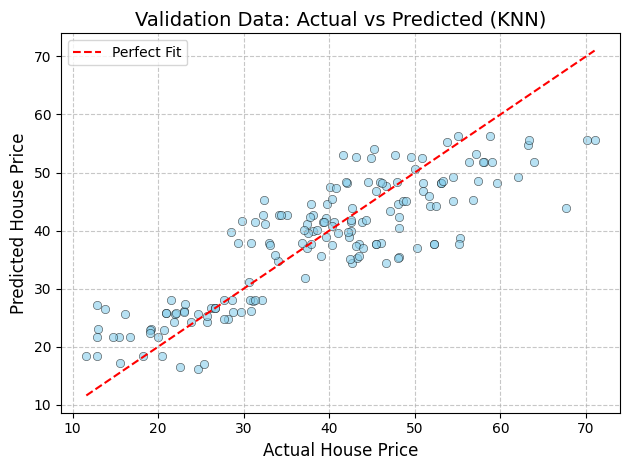

In [47]:
# Ensure both arrays are reshaped to 1D if needed
valid_y_orig = valid_y_orig.ravel()
valid_pred_orig = valid_pred_orig.ravel()
# Recalculate residuals in original scale
valid_residuals_orig = valid_y_orig - valid_pred_orig

# Create a result DataFrame for validation
result1 = pd.DataFrame({
    'Actual': valid_y_orig,
    'Predicted': valid_pred_orig,
    'Residual': valid_residuals_orig
})

# Plot 1: Actual vs Predicted for Validation Data
plt.figure()
sns.scatterplot(x=valid_y_orig, y=valid_pred_orig, alpha=0.6, color='skyblue', edgecolor='k')

# Perfect prediction line
min_val = min(valid_y_orig.min(), valid_pred_orig.min())
max_val = max(valid_y_orig.max(), valid_pred_orig.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Fit')

plt.title("Validation Data: Actual vs Predicted (KNN)", fontsize=14)
plt.xlabel("Actual House Price", fontsize=12)
plt.ylabel("Predicted House Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

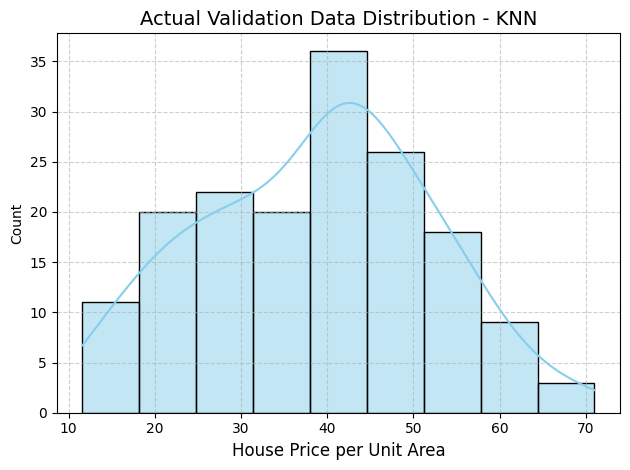

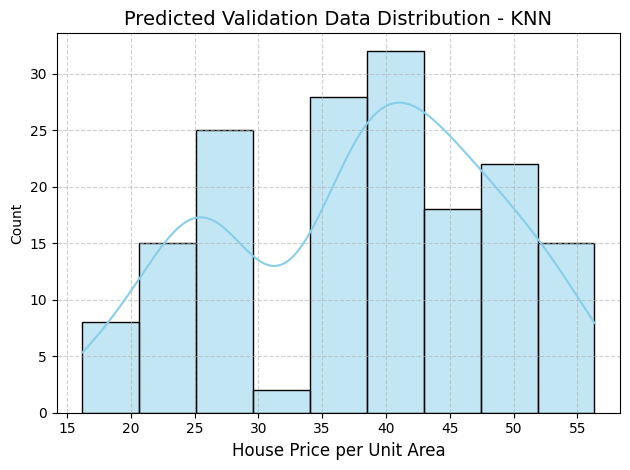

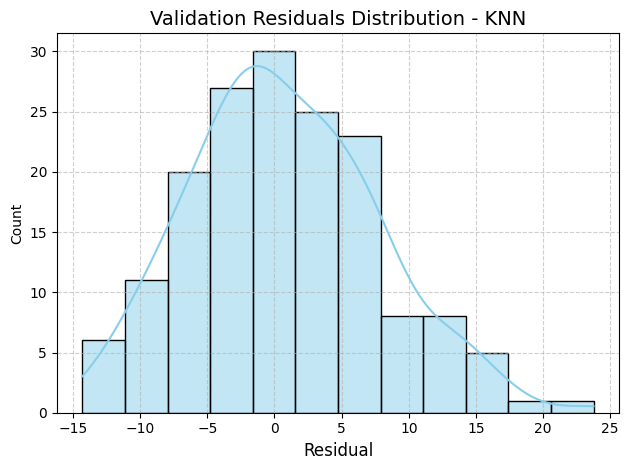

In [48]:
# Plot Actual Validation Data Distribution
plt.figure()
sns.histplot(result1['Actual'], kde=True, color='skyblue')
plt.xlabel('House Price per Unit Area', fontsize=12)
plt.title("Actual Validation Data Distribution - KNN", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot Predicted Validation Data Distribution
plt.figure()
sns.histplot(result1['Predicted'], kde=True, color='skyblue')
plt.xlabel('House Price per Unit Area', fontsize=12)
plt.title("Predicted Validation Data Distribution - KNN", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot Residuals Distribution (Validation)
plt.figure()
sns.histplot(result1['Residual'], kde=True, color='skyblue')
plt.xlabel('Residual', fontsize=12)
plt.title("Validation Residuals Distribution - KNN", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()